In [1]:
from matplotlib import pyplot as plt
import numpy as np
#from sympy import *
#from sympy import MatrixSymbol, Matrix
import math
import cmath
import pandas as pd

# Database e input dati

In [2]:
#da interno a esterno

pareti = {
    "0" : {
        "descrizione"     : "Parete formata da boh",
        "strati"          : ["ciao","topo","gigio"],
        "spessori"        : np.array([0.2,0.1,0.005]),
        "trasmittanze"    : np.array([1.8,0.04,1.]),
        "mu"              : np.array([6.,10.,8.]),
        "densità"         : np.array([2400.,30.,1200.]),
        "caloreSpecifico" : np.array([1000.,1400.,1500.])
    },
    "1" : {
        "descrizione"     : "Parete in muratura con isolante esterno",
        "spessori"        : np.array([0.015,0.2,0.14,0.015]),
        "trasmittanze"    : np.array([0.6,0.23,0.035,0.9]),
        "mu"              : np.array([6.,10.,1.,8.]),
        "densità"         : np.array([1500.,860.,1200.,1800.]),
        "caloreSpecifico" : np.array([1000.,840.,1500.,1000.])
    },
    "2" : {
        "descrizione"     : "Parete in muratura con isolante interno",
        "spessori"        : np.array([0.015,0.14,0.2,0.015]),
        "trasmittanze"    : np.array([0.6,0.035,0.23,0.9]),
        "mu"              : np.array([6.,1.,10.,8.]),
        "densità"         : np.array([1500.,1200.,860.,1800.]),
        "caloreSpecifico" : np.array([1000.,1500.,840.,1000.])
    },
    "4" : {
        "descrizione"     : "Parete formata da boh",
        "spessori"        : np.array([0.2,0.1,0.005]),
        "trasmittanze"    : np.array([1.8,0.04,1.]),
        "mu"              : np.array([6,10,8]),
        "densità"         : np.array([2400.,30.,1200.]),
        "caloreSpecifico" : np.array([1000.,1400.,1500.])
    },
    "5" : {
        "descrizione"     : "Parete formata da boh",
        "spessori"        : np.array([0.2,0.1,0.005]),
        "trasmittanze"    : np.array([1.8,0.04,1.]),
        "mu"              : np.array([6,10,8]),
        "densità"         : np.array([2400.,30.,1200.]),
        "caloreSpecifico" : np.array([1000.,1400.,1500.])
    },
    "6" : {
        "descrizione"     : "Parete formata da boh",
        "spessori"        : np.array([0.2,0.1,0.005]),
        "trasmittanze"    : np.array([1.8,0.04,1.]),
        "mu"              : np.array([6,10,8]),
        "densità"         : np.array([2400.,30.,1200.]),
        "caloreSpecifico" : np.array([1000.,1400.,1500.])
    }    
}

In [3]:
# INPUT DATI:

# Scegliere la parete
parete = "2"

Ti=20.
Te=-5.
URi=0.65
URe=0.9 #0.9 forse

# in orizzontale:
Rsi=0.130
Rse=0.040

# Tempo dinamica
tempo = 24 # ore -> secondi=86400


print(pareti[parete]["descrizione"])
spessori = pareti[parete]["spessori"]
trasmittanze = pareti[parete]["trasmittanze"]
mu = pareti[parete]["mu"]
densità = pareti[parete]["densità"]
caloreSpecifico = pareti[parete]["caloreSpecifico"]

print("Spessore totale = ",sum(spessori))

if len(spessori)==len(trasmittanze)==len(mu)==len(densità)==len(caloreSpecifico):
    print("Dimensioni ok")
else:
    print("Devono avere la stessa lunghezza!")

Parete in muratura con isolante interno
Spessore totale =  0.37000000000000005
Dimensioni ok


In [4]:
# Spessori equivalenti (metri)
Sd = spessori * mu 
Sdtot = sum(Sd)
SdCumSum = Sd.cumsum()
SdCumSum = np.insert(SdCumSum,0,0.)
print(Sd)
print(Sdtot)
print(SdCumSum)

[0.09 0.14 2.   0.12]
2.35
[0.   0.09 0.23 2.23 2.35]


In [5]:
resistenze=spessori/trasmittanze
# Aggiunge le resistenze superficiali al vettore resistenze e calcola la somma cumolata
resistenze = np.insert(resistenze,0,Rsi)
resistenze = np.append(resistenze,Rse)
resistenze = np.array(resistenze)
Rtot = sum(resistenze)
resistenzeCumSum = resistenze.cumsum()

print(resistenze)
print(resistenzeCumSum)
print(Rtot)
print(1/Rtot)

[0.13       0.025      4.         0.86956522 0.01666667 0.04      ]
[0.13       0.155      4.155      5.02456522 5.04123188 5.08123188]
5.0812318840579715
0.19680266967099724


In [6]:
# Calcola le temperature superficiali i-esimme

deltaT=Ti-Te
temperature=np.array([])

for i in range(0,len(resistenze)):
    T=Ti-((resistenzeCumSum[i]*deltaT)/Rtot)
    temperature = np.append(temperature,T)

# Ritorna alla dimensione inziale aggiungendo la Ti all'inizio. L'ultima è già la Te    
temperature = np.insert(temperature,0,Ti)

print("Temperature superficiali = ",temperature)     

Temperature superficiali =  [20.         19.36039132 19.23738966 -0.44287731 -4.72119622 -4.80319733
 -5.        ]


In [7]:
# Pressione di saturazione per ogni temperatura i-esima
pressioniSaturazione=610.5*10**(7.5*temperature/(237.3+temperature))

print("pressioni saturazione = ",pressioniSaturazione) 

pressioni saturazione =  [2337.02166166 2246.08000015 2228.95068222  591.10156509  429.97243875
  427.30865375  420.97517087]


In [8]:
temperature[5]

-4.803197330329002

In [9]:
Pi = URi * pressioniSaturazione[0]
Pe = URe * pressioniSaturazione[-1]
deltaP = Pi - Pe
pressioni = np.array([])
for p in range(1,len(temperature)-2): #valori interni a T perché conosciamo già gli estremi
    P=Pi-((SdCumSum[p]*deltaP)/Sdtot)
    pressioni = np.append(pressioni,P)

# Ritorna alla dimensione inziale aggiungendo la Pi all'inizio. L'ultima è già la Pe    
pressioni = np.insert(pressioni,0,Pi)

print("Pi = ", Pi)
print("Pe = ", Pe)
print("Pressioni interne = ", pressioni)

Pi =  1519.06408007576
Pe =  378.87765377986386
Pressioni interne =  [1519.06408008 1475.39736588 1407.47136601  437.09993938  378.87765378]


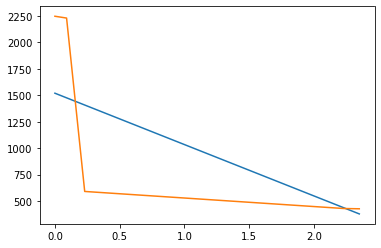

In [10]:
plt.plot(SdCumSum,pressioni)
plt.plot(SdCumSum,pressioniSaturazione[1:-1])

[0.    0.015 0.14  0.2   0.015 0.   ]
[0.    0.    0.015 0.155 0.355 0.37  0.37 ]
[20.         19.36039132 19.23738966 -0.44287731 -4.72119622 -4.80319733
 -5.        ]


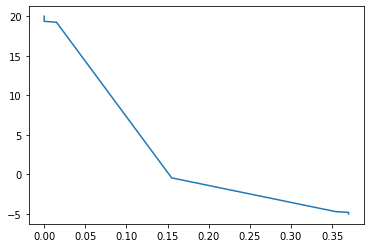

In [11]:
spess=spessori
spess=np.insert(spess,0,0)
spess=np.append(spess,0)
spesss=np.cumsum(spess)
spesss=np.insert(spesss,0,0)
print(spess)
print(spesss)
print(temperature)
plt.plot(spesss,temperature)



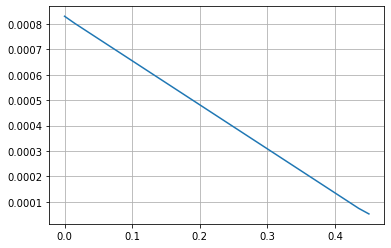

In [12]:
s=np.array([0. ,0.015, 0.435, 0.45])
t=np.array([16.61502409, 16.05780497,  1.47637026,  1.04153105])
t=.00005*t
plt.plot(s,t)
plt.grid(True)


spesss= [0.    0.015 0.155 0.355 0.37 ]
pSat= [2246.08000015 2228.95068222  591.10156509  429.97243875  427.30865375]


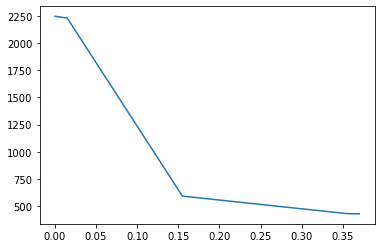

In [13]:
print("spesss=",spesss[1:-1])
print("pSat=",pressioniSaturazione[1:-1])
plt.plot(spesss[1:-1],pressioniSaturazione[1:-1])

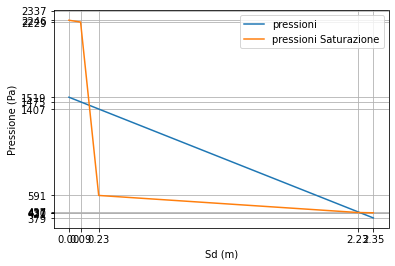

In [14]:
plt.plot(SdCumSum,pressioni,label="pressioni")
plt.plot(SdCumSum,pressioniSaturazione[1:-1], label="pressioni Saturazione")
plt.legend(loc="best")
plt.xlabel("Sd (m)")  
plt.ylabel("Pressione (Pa)")
plt.grid()
plt.xticks(SdCumSum)
plt.yticks(np.hstack((pressioni,pressioniSaturazione))) #i due vettori affiancati
plt.show()

In [15]:
np.hstack((pressioni,pressioniSaturazione))

array([1519.06408008, 1475.39736588, 1407.47136601,  437.09993938,
        378.87765378, 2337.02166166, 2246.08000015, 2228.95068222,
        591.10156509,  429.97243875,  427.30865375,  420.97517087])

In [16]:
pressioni

array([1519.06408008, 1475.39736588, 1407.47136601,  437.09993938,
        378.87765378])

In [17]:
pressioniSaturazione

array([2337.02166166, 2246.08000015, 2228.95068222,  591.10156509,
        429.97243875,  427.30865375,  420.97517087])

In [18]:
profonditàPenetrazione = np.sqrt((trasmittanze*tempo*3600)/(  math.pi*densità * caloreSpecifico))
xi = spessori/profonditàPenetrazione
print("delta = ",profonditàPenetrazione)
print("xi = ",xi)

# Calcola le matrice di trasferimento di ogni strato e le inserisce in una lista, 
# per poi moltiplicarle tra di loro in Z

zz = [] # zz : lista di matrici z
for i in range(0,len(xi)):
    # z : matrice per ogni strato
    z = np.zeros((2,2),dtype=np.complex128) # matrice complex float
    z[0][0] = complex(  (np.cosh(xi[i])*np.cos(xi[i])) , (np.sinh(xi[i])*np.sin(xi[i]))  )
    z[1][1] = z[0][0] 
    z[0][1] = -(profonditàPenetrazione[i]/(2*trasmittanze[i])) * complex(  (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i])) , (np.cosh(xi[i])*np.sin(xi[i]) - np.sinh(xi[i])*np.cos(xi[i]))  )
    z[1][0] = -(trasmittanze[i]/( profonditàPenetrazione[i]))  * complex(  (np.sinh(xi[i])*np.cos(xi[i]) - np.cosh(xi[i])*np.sin(xi[i])) , (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i]))  )
    # aggiunge alla lista zz
    zz.append(z)
print("zz = ",zz)

# Z: matrice di trasferimento totale  del componente edilizio = Z_N * Z_n-1 * ... * Z_1   
Z = np.zeros((2,2),dtype=np.complex128)
Z = zz[-1] #Z_N
for i in range(1,len(zz)): # [1  2 ... N  N+1)
    Z = Z.dot(zz[-1-i]) # prodotto scalare
print("Z =",Z)   

delta =  [0.10488465 0.02312489 0.09357439 0.1172646 ]
xi =  [0.14301426 6.05408245 2.13733704 0.12791584]
zz =  [array([[ 0.99993028+2.04529821e-02j, -0.02499965-1.70441970e-04j],
       [ 0.0111554 -1.63622336e+00j,  0.99993028+2.04529821e-02j]]), array([[ 207.36154689 -48.3556062j ,  -52.52757023 +84.47701255j],
       [-387.03052796-240.65450026j,  207.36154689 -48.3556062j ]]), array([[-2.30648596+3.52644936j, -0.28129611-1.19391907j],
       [14.42602192-3.39887679j, -2.30648596+3.52644936j]]), array([[ 0.99995538+1.63624131e-02j, -0.01666652-9.09024493e-05j],
       [ 0.01070919-1.96347789e+00j,  0.99995538+1.63624131e-02j]])]
Z = [[-1690.09139888+1822.70113475j  -241.27472755 -696.46980848j]
 [11869.02894982+2323.9206009j  -2263.40477017+2781.86918736j]]


In [19]:
# Strato d'aria interno 
Zsi = np.zeros((2,2),dtype=np.complex128)
Zsi[0][0] = complex(1,0)
Zsi[1][1] = complex(1,0)
Zsi[0][1] = complex(-Rsi)
Zsi[1][0] = complex(0,0)
print("Zsi = ",Zsi)

# Strato d'aria esterno
Zse = np.zeros((2,2),dtype=np.complex128)
Zse[0][0] = complex(1,0)
Zse[1][1] = complex(1,0)
Zse[0][1] = complex(-Rse)
Zse[1][0] = complex(0,0)
print("Zse = ",Zse)

# Zee: matrice di trasferimento da ambiente ad ambiente 
Zee = Zse.dot(Z)
Zee = Zee.dot(Zsi)
print("Zee = ",Zee)

Zsi =  [[ 1.  +0.j -0.13+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zse =  [[ 1.  +0.j -0.04+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zee =  [[-2164.85255687+1729.74431071j   130.69229565-1032.61133637j]
 [11869.02894982+2323.9206009j  -3806.37853365+2479.75950924j]]


In [20]:
Y12 = -1/Zee[0][1]
Y12 = np.sqrt((Y12.real)**2 + (Y12.imag)**2) # il modulo
print("Y12 = ", Y12, "(trasmittanza termica periodica)")

f = -np.sqrt((Y12.real)**2 + (Y12.imag)**2)/(1/Rtot)
print("f = ", f, "(attenuazione)")

phase = (math.atan2(Zee[0][1].imag,Zee[0][1].real))*tempo/(2*math.pi) # tempo in ore
sfasamento = phase+tempo/2 # tempo in ore
print("phase = ", phase)
print("sfasamento = ", sfasamento, "[ore]")

Y11 = -Zee[0][0]/Zee[0][1]
Y11 = np.sqrt((Y11.real)**2 + (Y11.imag)**2) # il modulo
print("Y11 = ", Y11, "(ammettenza termica interna Yii)")

Y22 = -Zee[1][1]/Zee[0][1]
Y22 = np.sqrt((Y22.real)**2 + (Y22.imag)**2) # il modulo
print("Y22 = ", Y22, "(ammettenza termica esterna Yee)")

Y12 =  0.000960754150329189 (trasmittanza termica periodica)
f =  -0.0048818146213937 (attenuazione)
phase =  -5.519114731357791
sfasamento =  6.480885268642209 [ore]
Y11 =  2.6622776565644175 (ammettenza termica interna Yii)
Y22 =  4.364587226663046 (ammettenza termica esterna Yee)


In [21]:
massaSuperficiale = sum(spessori*densità)
print("Massa superficiale = ", massaSuperficiale)

capacitàTermicaAreica = spessori*densità*caloreSpecifico
print("Capacità termica areica = ", capacitàTermicaAreica, "Totale = ", sum(capacitàTermicaAreica) )

Massa superficiale =  389.5
Capacità termica areica =  [ 22500. 252000. 144480.  27000.] Totale =  445980.0
